# Examen de Interciclo Simulación

## Nombre: David Egas

### Desarrollo


Diseñe y desarrolle un modelo y/o script que permita simular el siguiente caso real: Obtener datos de tendencia de twitter o facebook, para ello se puede obtener a través del API.
    - Title: Titulo del Post/Twitter
    - Word count: la cantidad de palabras del artículo,
    - # of Links: los enlaces externos que contiene,
    - # of comments: cantidad de comentarios,
    - # Shares: compartidos.
    - HashTag


En base a ello, se pretende proponer y generar una predicción de cuántas veces será compartido un post/twitter  utilizando regresión.


## Conexión a Twitter

Se utiliza la librería tweepy para conectarse con la red social twitter, luego tomamos los datos de twits acerca de los candidatos presidenciales para Ecuador, posterior a eso, guardamos los datos en un archivo csv para continuar con el entrenamiento.

In [35]:
import tweepy
import json
import csv
# 4 cadenas para la autenticacion
consumer_key = "phQeaIikoepY4x8i1HpSU6w7M"
consumer_secret = "J7fpAAey5TYKsmtaM3ynGzRKCmd0bT8M7amFlhft0JLYcemayj"
access_token = "1340005738090029058-qVszK5YUyHt6u8q3zGXshQ9nbKfPGG"
access_token_secret = "lX8elBjtOhtRkC1wLmJew8RdwCGYvipeaFNrjG15HGaH2"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
# con este objeto realizaremos todas las llamadas al API
api = tweepy.API(auth,
                 wait_on_rate_limit=True,
                 wait_on_rate_limit_notify=True)
# Open/create a file to append data to
csvFile = open('juan.csv', 'w')

#Use csv writer
csvWriter = csv.writer(csvFile)

contH = 0
contRt=0
contPM =0
contUrls=0
guardar = 0
seguidores = 0
#Buscar Tweets
for tweet in tweepy.Cursor(api.search, 
                           q="candidato presidencial Juan Fernando Velasco", 
                           tweet_mode="").items(100):
    
    
    for numeroT in [tweet.entities]:
        for hashtags in numeroT['hashtags']:
            contH = contH+1
        print ("Número de Hahstags",contH) 
        
        for menciones in numeroT['user_mentions']:
            contPM=contPM +1
        print ("Personas mencionadas",contPM)  
        
        for urls in numeroT['urls']:
            guardar = len(urls)
        print ("Numero de Urls",guardar)
        
    #for usuarios in [tweet.user]:
        #for followers in usuarios['entities']:
            
        #seguidores = usuarios[tweet.id]
        #print(usuarios)
       
            
      
        
    #print(numeroT)   
    
    
    numRT=tweet.retweet_count
    print ("Contador RT",numRT) 
    print ("Seguidores ", seguidores)
    
    
    texto = tweet.text
    print("El texto: ",texto)
    palabras = texto.split()
    i=0
    while i<len(palabras):
        palabra = palabras[i]
        if palabra == 'Fin':
            break
        i+=1
    print ("Numero de palabras:", + i)
    
    #print("Followers", tweet.followers_count)
    
    print('PRIMEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEER TWIT')
    #print (json.dumps(tweet._json, indent=4))
    csvWriter.writerow([tweet.id, "Candidato Juan Fernando Velasco",contH,contPM,guardar, i, numRT])
    #print (tweet.created_at, tweet.text)

    
csvFile.close()



Número de Hahstags 0
Personas mencionadas 1
Numero de Urls 0
Contador RT 1
Seguidores  0
El texto:  RT @mariasolborja: Aquí un adelanto de la entrevista al candidato presidencial por Construye, ex Ruptura. La pueden ver completa aquí ⬇️

h…
Numero de palabras: 22
PRIMEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEER TWIT
Número de Hahstags 0
Personas mencionadas 2
Numero de Urls 4
Contador RT 0
Seguidores  0
El texto:  "Necesitamos un país que deje de hablar del pasado", dice @JuanFerVelasco, candidato presidencial por Construye, en… https://t.co/ay2ycCDgad
Numero de palabras: 17
PRIMEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEER TWIT
Número de Hahstags 0
Personas mencionadas 3
Numero de Urls 4
Contador RT 3
Seguidores  0
El texto:  RT @mariasolborja: Algunas preguntas que respondió el candidato presidencial por Construye, antes Rupruta: si quisiera que Ma. Paula Romo s…
Numero de palabras: 20
PRIMEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEER TWIT
Número de Hahstags 0
Personas mencion

## Modelo Regresión Lineal

In [50]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
#cargamos los datos de entrada
data = pd.read_csv("datasetpresidentes.csv",encoding='latin-1')
#veamos cuantas dimensiones y registros contiene
data.shape

(382, 7)

In [52]:
#son 161 registros con 8 columnas. Veamos los primeros registros
data.head()

,id,Candidato,#Hashtags,PersonasMencionadas,Urls,#Palabras,#Retweets
0,1340451915835043847,Candidato Andrés Arauz,0,2,4,12,98
1,1340451202899849217,Candidato Andrés Arauz,0,2,4,12,0
2,1340448977372786689,Candidato Andrés Arauz,0,3,4,23,85
3,1340448798313734145,Candidato Andrés Arauz,0,4,4,23,85
4,1340448649847975937,Candidato Andrés Arauz,2,5,4,13,15


In [53]:
# Ahora veamos algunas estadísticas de nuestros datos
data.describe()

,id,#Hashtags,PersonasMencionadas,Urls,#Palabras,#Retweets
count,3.820000e+02,382.000000,382.000000,382.000000,382.000000,382.000000
mean,1.339540e+18,20.015707,43.070681,3.926702,19.295812,22.769634
std,9.453941e+14,26.915534,33.117903,0.537193,3.613032,29.350526
min,1.337253e+18,0.000000,0.000000,0.000000,5.000000,0.000000
25%,1.338946e+18,3.000000,15.000000,4.000000,18.000000,3.000000
50%,1.339893e+18,11.000000,35.500000,4.000000,20.000000,15.000000
75%,1.340391e+18,21.750000,68.000000,4.000000,22.000000,34.000000
max,1.340457e+18,115.000000,123.000000,4.000000,27.000000,162.000000


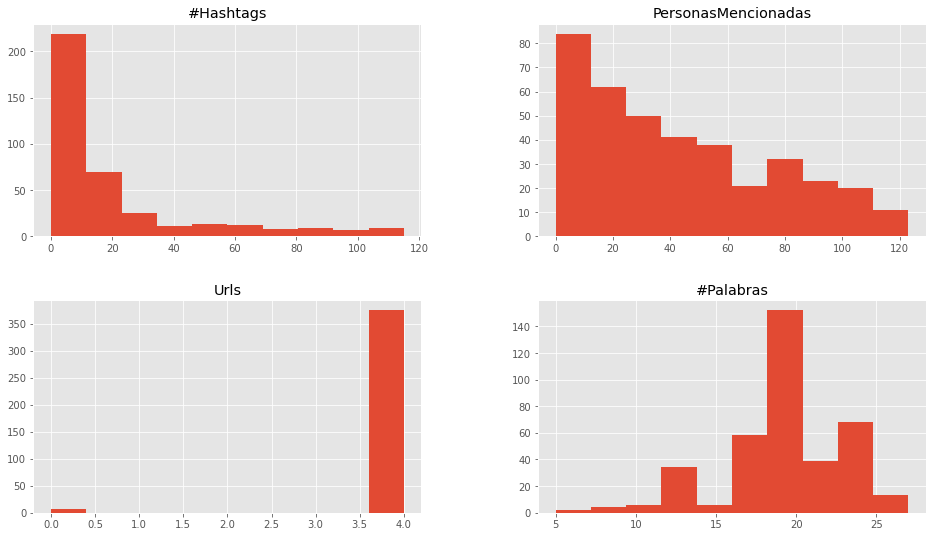

In [54]:
# Visualizamos rápidamente las caraterísticas de entrada
data.drop(['id','Candidato', '#Retweets'],1).hist()
plt.show()

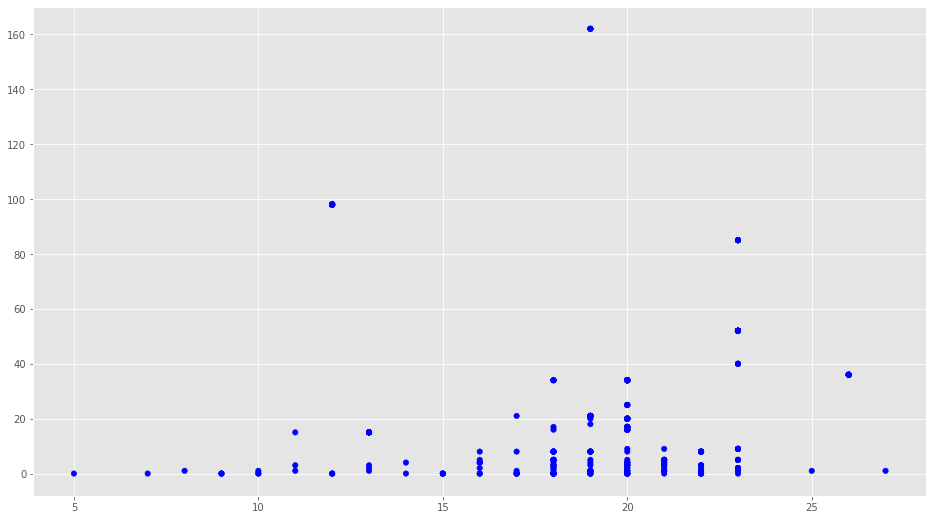

In [57]:
# Vamos a RECORTAR los datos en la zona donde se concentran más los puntos
# esto es en el eje X: entre 0 y 3.500
# y en el eje Y: entre 0 y 80.000
filtered_data = data[(data['#Palabras'] <= 300) & (data['#Retweets'] <= 300)]

colores=['orange','blue']
tamanios=[30,60]

f1 = filtered_data['#Palabras'].values
f2 = filtered_data['#Retweets'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['#Palabras']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [58]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_data[["#Palabras"]]
X_train = np.array(dataX)
y_train = filtered_data['#Retweets'].values

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [0.15402033]
Independent term: 
 19.797686200099488
Mean squared error: 858.89
Variance score: 0.00


In [69]:
#Vamos a comprobar:
# Quiero predecir cuántos "Retwits" voy a obtener por un artículo con 10 palabras,
# según nuestro modelo, hacemos:
y_Dosmil = regr.predict([[10]])
print("Se realizarán",int(y_Dosmil),"Retwits")

Se realizarán 21 Retwits


## Modelo Probabilistico

In [65]:
# Importar las librerias para el analasis
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
# Carga del dataset
df = pd.read_csv("datasetpresidentes.csv",encoding='latin-1')
df

,id,Candidato,#Hashtags,PersonasMencionadas,Urls,#Palabras,#Retweets
0,1340451915835043847,Candidato Andrés Arauz,0,2,4,12,98
1,1340451202899849217,Candidato Andrés Arauz,0,2,4,12,0
2,1340448977372786689,Candidato Andrés Arauz,0,3,4,23,85
3,1340448798313734145,Candidato Andrés Arauz,0,4,4,23,85
4,1340448649847975937,Candidato Andrés Arauz,2,5,4,13,15
...,...,...,...,...,...,...,...
377,1339597341628633089,Candidato Juan Fernando Velasco,0,3,4,19,1
378,1339366067290988545,Candidato Juan Fernando Velasco,0,4,4,20,3
379,1339362268044271620,Candidato Juan Fernando Velasco,0,4,4,18,0
380,1339361913860468737,Candidato Juan Fernando Velasco,0,4,4,18,3


In [67]:
filtro = df["#Palabras"] # Filtro los datos que se empezo a tener casos
#Obtenemos la mediana
media = filtro.mean()
mediana = filtro.median()
print(mediana)
print(media)


20.0
19.29581151832461


In [71]:
y = list(df.iloc [:, 6]) # Total casos
x = list(df.iloc [:, 5]) # Dias
#Realizamos un ejemplo de prediccion
prediccion_siguiente = int(y[-1] + mediana)

print("Se realizarán",prediccion_siguiente,"Retwits")

Se realizarán 20 Retwits


# Simulación de votaciones

In [18]:
import simpy
import random as rd
import numpy as np
import matplotlib.pyplot as pp
import random

%matplotlib inline

PERSONAS_VOTANDO = 5126
TASA_CRECIMIENTO = 3
TIEMPO_SIMULACION = 100
per_que_votaron = []
per_que_no_votaron = []

candidato2 = 0
candidato3=0
candidato1 =0
class Persona(object):
    
    def __init__(self,nombre,area_trabajo,estado_voto):
        self.nombre = nombre
        self.area_trabajo = area_trabajo
        self.estado_voto = estado_voto
        
        
class Simulacion_Votaciones(object):
    
    def __init__(self, env):
        self.env = env
        
    def mesa1(self,persona):
        yield self.env.timeout(rd.randint(2, 7))
       
     
        
    def mesa2(self,persona):
        yield self.env.timeout(rd.randint(5, 14))
        self.mesa4(persona)
       
        
    def mesa3(self,persona):
        yield self.env.timeout(rd.randint(3, 7))
        
        
    def mesa4(self,persona):
        test = True
        if(rd.randint(1,100)<=30):
            test = False 
            self.env.process(self.mesa3(persona))
            
           
        else:
           
            print('La persona ',persona.nombre,' realiza el proceso de votación')
            
        

def crear_persona(nombre):
    e=False
    area_trabajo=rd.randint(1,5)
    if(rd.randint(1,100)>=30):
        e = True
    return Persona(nombre,area_trabajo,e)
        
        
    
def ejecutar_simulacion(env, personas_recuperadas, candidato1):
    trabajo = Simulacion_Votaciones(env)
    aleatorio = random.randint(1, 3)
    cand1 = 0
    for i in range(personas_recuperadas ):
        persona=crear_persona(i)
        if(persona.estado_voto):
            env.process(trabajo.mesa1(persona))
            env.process(trabajo.mesa2(persona))
            per_que_votaron.append(persona)
            candidato1 +=1
            
        else:
            per_que_no_votaron.append(persona)
            
    
  
    
    personas=personas_recuperadas
    while True:
        yield env.timeout(1)
        
        personas+=1
        for i in range(TASA_CRECIMIENTO):
            persona=crear_persona(personas)
        
            if(persona.estado_voto):
                env.process(trabajo.mesa1(persona))
                env.process(trabajo.mesa2(persona))
                tiempo = env.now
                per_que_votaron.append(persona)

            else:
                tiempo = env.now
                per_que_no_votaron.append(persona)
   


print ('empieza simulacion')        
env=simpy.Environment()
env.process(ejecutar_simulacion(env,PERSONAS_VOTANDO, candidato1))
env.run(until=TIEMPO_SIMULACION)
tep = 0.1 / 100
print()   
print('Personas que votaron en el recinto Herlinda Toral',len(per_que_votaron))
print('Personas que no votaron en el recinto Herlinda Toral',len(per_que_no_votaron))



    


empieza simulacion
La persona  10  realiza el proceso de votación
La persona  30  realiza el proceso de votación
La persona  31  realiza el proceso de votación
La persona  35  realiza el proceso de votación
La persona  55  realiza el proceso de votación
La persona  99  realiza el proceso de votación
La persona  137  realiza el proceso de votación
La persona  158  realiza el proceso de votación
La persona  160  realiza el proceso de votación
La persona  165  realiza el proceso de votación
La persona  197  realiza el proceso de votación
La persona  219  realiza el proceso de votación
La persona  231  realiza el proceso de votación
La persona  239  realiza el proceso de votación
La persona  243  realiza el proceso de votación
La persona  265  realiza el proceso de votación
La persona  320  realiza el proceso de votación
La persona  323  realiza el proceso de votación
La persona  378  realiza el proceso de votación
La persona  396  realiza el proceso de votación
La persona  406  realiza el

La persona  2001  realiza el proceso de votación
La persona  2032  realiza el proceso de votación
La persona  2124  realiza el proceso de votación
La persona  2125  realiza el proceso de votación
La persona  2175  realiza el proceso de votación
La persona  2176  realiza el proceso de votación
La persona  2263  realiza el proceso de votación
La persona  2276  realiza el proceso de votación
La persona  2285  realiza el proceso de votación
La persona  2289  realiza el proceso de votación
La persona  2344  realiza el proceso de votación
La persona  2363  realiza el proceso de votación
La persona  2382  realiza el proceso de votación
La persona  2431  realiza el proceso de votación
La persona  2469  realiza el proceso de votación
La persona  2481  realiza el proceso de votación
La persona  2494  realiza el proceso de votación
La persona  2524  realiza el proceso de votación
La persona  2532  realiza el proceso de votación
La persona  2586  realiza el proceso de votación
La persona  2600  re

La persona  4925  realiza el proceso de votación
La persona  4927  realiza el proceso de votación
La persona  4957  realiza el proceso de votación
La persona  4964  realiza el proceso de votación
La persona  5002  realiza el proceso de votación
La persona  5009  realiza el proceso de votación
La persona  5028  realiza el proceso de votación
La persona  5039  realiza el proceso de votación
La persona  5051  realiza el proceso de votación
La persona  5057  realiza el proceso de votación
La persona  5082  realiza el proceso de votación
La persona  5124  realiza el proceso de votación
La persona  5125  realiza el proceso de votación
La persona  7  realiza el proceso de votación
La persona  56  realiza el proceso de votación
La persona  94  realiza el proceso de votación
La persona  104  realiza el proceso de votación
La persona  133  realiza el proceso de votación
La persona  153  realiza el proceso de votación
La persona  188  realiza el proceso de votación
La persona  201  realiza el pro

La persona  2294  realiza el proceso de votación
La persona  2301  realiza el proceso de votación
La persona  2309  realiza el proceso de votación
La persona  2310  realiza el proceso de votación
La persona  2368  realiza el proceso de votación
La persona  2371  realiza el proceso de votación
La persona  2405  realiza el proceso de votación
La persona  2411  realiza el proceso de votación
La persona  2464  realiza el proceso de votación
La persona  2471  realiza el proceso de votación
La persona  2513  realiza el proceso de votación
La persona  2539  realiza el proceso de votación
La persona  2558  realiza el proceso de votación
La persona  2569  realiza el proceso de votación
La persona  2579  realiza el proceso de votación
La persona  2585  realiza el proceso de votación
La persona  2620  realiza el proceso de votación
La persona  2625  realiza el proceso de votación
La persona  2644  realiza el proceso de votación
La persona  2651  realiza el proceso de votación
La persona  2664  re

La persona  5145  realiza el proceso de votación
La persona  5144  realiza el proceso de votación
La persona  5148  realiza el proceso de votación
La persona  5141  realiza el proceso de votación
La persona  5141  realiza el proceso de votación
La persona  5143  realiza el proceso de votación
La persona  5148  realiza el proceso de votación
La persona  5144  realiza el proceso de votación
La persona  5146  realiza el proceso de votación
La persona  5147  realiza el proceso de votación
La persona  5152  realiza el proceso de votación
La persona  5148  realiza el proceso de votación
La persona  5153  realiza el proceso de votación
La persona  5149  realiza el proceso de votación
La persona  5146  realiza el proceso de votación
La persona  5153  realiza el proceso de votación
La persona  5154  realiza el proceso de votación
La persona  5156  realiza el proceso de votación
La persona  5157  realiza el proceso de votación
La persona  5153  realiza el proceso de votación
La persona  5158  re